In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [246]:
df = pd.read_csv('data.csv')
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [247]:
df.shape

(1048567, 9)

In [248]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [249]:
df.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

In [250]:
df.isna().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [251]:
df.dropna(inplace=True)

In [252]:
df.duplicated().sum()

0

In [253]:
df['CustGender'].value_counts()

M    760978
F    280635
T         1
Name: CustGender, dtype: int64

In [254]:
df[df['CustGender'] == 'T']

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
959987,T959988,C3380368,1/1/1800,T,CHENNAI,50050.0,10/9/16,170731,32500.0


In [255]:
df[df['CustomerID'] == 'C3380368']

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
959987,T959988,C3380368,1/1/1800,T,CHENNAI,50050.0,10/9/16,170731,32500.0


In [256]:
df.loc[959987, 'CustGender'] = 'M'

In [257]:
# df['CustLocation'] = df['CustLocation'].apply(lambda x: re.sub("([\(\[]).*?([\)\]])", "\g<1>\g<2>", x))

In [258]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

In [259]:
df.shape

(1041614, 9)

In [260]:
import datetime

def fix_date(x):
    if x.year > 2023:
        year = x.year - 100
    else:
        year = x.year

    return datetime.date(year,x.month,x.day)

In [261]:
df['CustomerDOB'] = df['CustomerDOB'].apply(fix_date)
df['TransactionDate'] = df['TransactionDate'].apply(fix_date)

In [262]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

In [263]:
df.dtypes

TransactionID                      object
CustomerID                         object
CustomerDOB                datetime64[ns]
CustGender                         object
CustLocation                       object
CustAccountBalance                float64
TransactionDate            datetime64[ns]
TransactionTime                     int64
TransactionAmount (INR)           float64
dtype: object

In [264]:
df['Age'] = df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year

In [265]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,28


In [266]:
df['CustomerID'].nunique()

879358

In [267]:
df['TransactionDate1'] = df['TransactionDate']
df['TransactionDate2'] = df['TransactionDate']

In [268]:
ndf = df.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'CustGender': 'first',
    'CustLocation': 'first',
    'CustAccountBalance': 'mean',
    'TransactionAmount (INR)': 'mean',
    'Age': 'median',
    'TransactionDate2': 'max',
    'TransactionDate1': 'min',
    'TransactionDate': 'median'
})

ndf = ndf.reset_index()

In [269]:
ndf.head()
ndf.shape

(879358, 10)

In [270]:
ndf['CustomerID'].nunique()

879358

In [271]:
ndf.drop(columns=['CustomerID'], inplace=True)
ndf.rename(columns={"TransactionID": "Frquency"}, inplace=True)
ndf['recency'] = ndf['TransactionDate2'] - ndf['TransactionDate1']
ndf['recency'] = ndf['recency'].astype(str)

In [272]:
ndf.head()

,Frquency,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age,TransactionDate2,TransactionDate1,TransactionDate,recency
0,2,F,NOIDA,76340.635,2553.0,28.5,2016-09-26,2016-09-08,2016-09-17,18 days
1,1,M,MUMBAI,24204.490,1499.0,22.0,2016-08-14,2016-08-14,2016-08-14,0 days
2,2,F,MUMBAI,100112.950,727.5,28.0,2016-07-08,2016-01-08,2016-04-08,182 days
3,1,F,CHAMPARAN,496.180,30.0,26.0,2016-09-15,2016-09-15,2016-09-15,0 days
4,1,M,KOLKATA,87058.650,5000.0,51.0,2016-08-18,2016-08-18,2016-08-18,0 days


In [273]:
import re

In [274]:
ndf['recency'] = ndf['recency'].apply(lambda x: re.search('\d+', x).group())
ndf['recency'] = ndf['recency'].astype(int)
ndf.head()

,Frquency,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age,TransactionDate2,TransactionDate1,TransactionDate,recency
0,2,F,NOIDA,76340.635,2553.0,28.5,2016-09-26,2016-09-08,2016-09-17,18
1,1,M,MUMBAI,24204.490,1499.0,22.0,2016-08-14,2016-08-14,2016-08-14,0
2,2,F,MUMBAI,100112.950,727.5,28.0,2016-07-08,2016-01-08,2016-04-08,182
3,1,F,CHAMPARAN,496.180,30.0,26.0,2016-09-15,2016-09-15,2016-09-15,0
4,1,M,KOLKATA,87058.650,5000.0,51.0,2016-08-18,2016-08-18,2016-08-18,0


In [275]:
def chng(i):
    if i==0:
        return 1
    else:
        return i
ndf['recency'] = ndf['recency'].apply(chng)

In [276]:
ndf.head()

,Frquency,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age,TransactionDate2,TransactionDate1,TransactionDate,recency
0,2,F,NOIDA,76340.635,2553.0,28.5,2016-09-26,2016-09-08,2016-09-17,18
1,1,M,MUMBAI,24204.490,1499.0,22.0,2016-08-14,2016-08-14,2016-08-14,1
2,2,F,MUMBAI,100112.950,727.5,28.0,2016-07-08,2016-01-08,2016-04-08,182
3,1,F,CHAMPARAN,496.180,30.0,26.0,2016-09-15,2016-09-15,2016-09-15,1
4,1,M,KOLKATA,87058.650,5000.0,51.0,2016-08-18,2016-08-18,2016-08-18,1


In [277]:
ndf.drop(columns=['TransactionDate1', 'TransactionDate2'], inplace=True)
ndf.head()

,Frquency,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age,TransactionDate,recency
0,2,F,NOIDA,76340.635,2553.0,28.5,2016-09-17,18
1,1,M,MUMBAI,24204.490,1499.0,22.0,2016-08-14,1
2,2,F,MUMBAI,100112.950,727.5,28.0,2016-04-08,182
3,1,F,CHAMPARAN,496.180,30.0,26.0,2016-09-15,1
4,1,M,KOLKATA,87058.650,5000.0,51.0,2016-08-18,1


In [278]:
ndf['CustGender'] = ndf['CustGender'].map({'F': 1, 'M': 0})
ndf.head()

,Frquency,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age,TransactionDate,recency
0,2,1,NOIDA,76340.635,2553.0,28.5,2016-09-17,18
1,1,0,MUMBAI,24204.490,1499.0,22.0,2016-08-14,1
2,2,1,MUMBAI,100112.950,727.5,28.0,2016-04-08,182
3,1,1,CHAMPARAN,496.180,30.0,26.0,2016-09-15,1
4,1,0,KOLKATA,87058.650,5000.0,51.0,2016-08-18,1


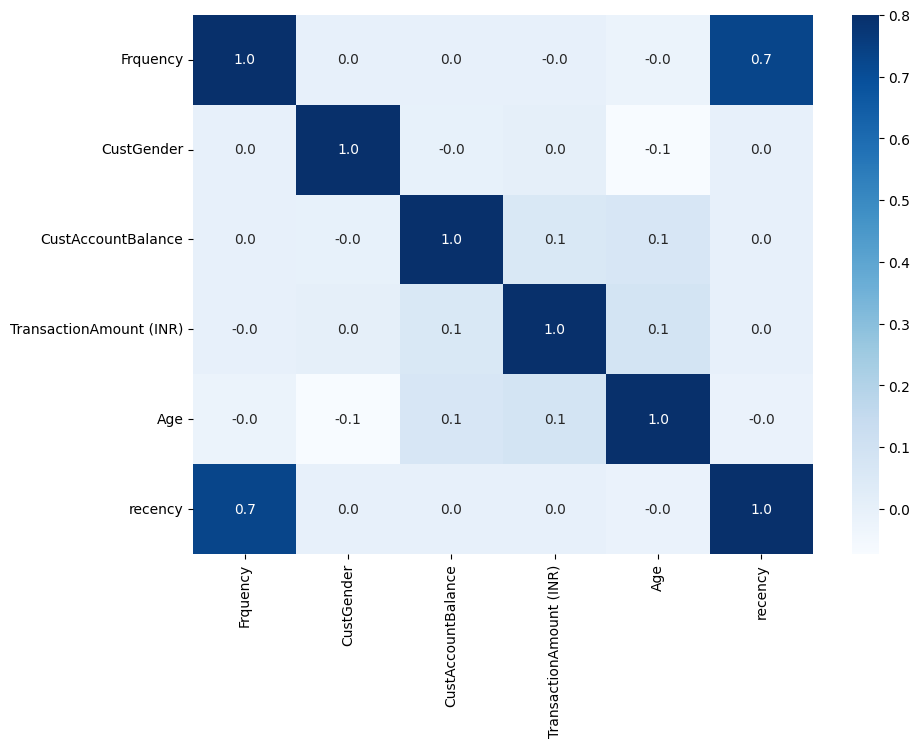

In [309]:
plt.figure(figsize=(10, 7))
correlation = ndf.corr(numeric_only=True)
sns.set_palette('Blues')
sns.heatmap(correlation, vmin=None, vmax=0.8, annot=True, fmt='.1f', linecolor='white', cbar=True, cmap='Blues')
plt.show()

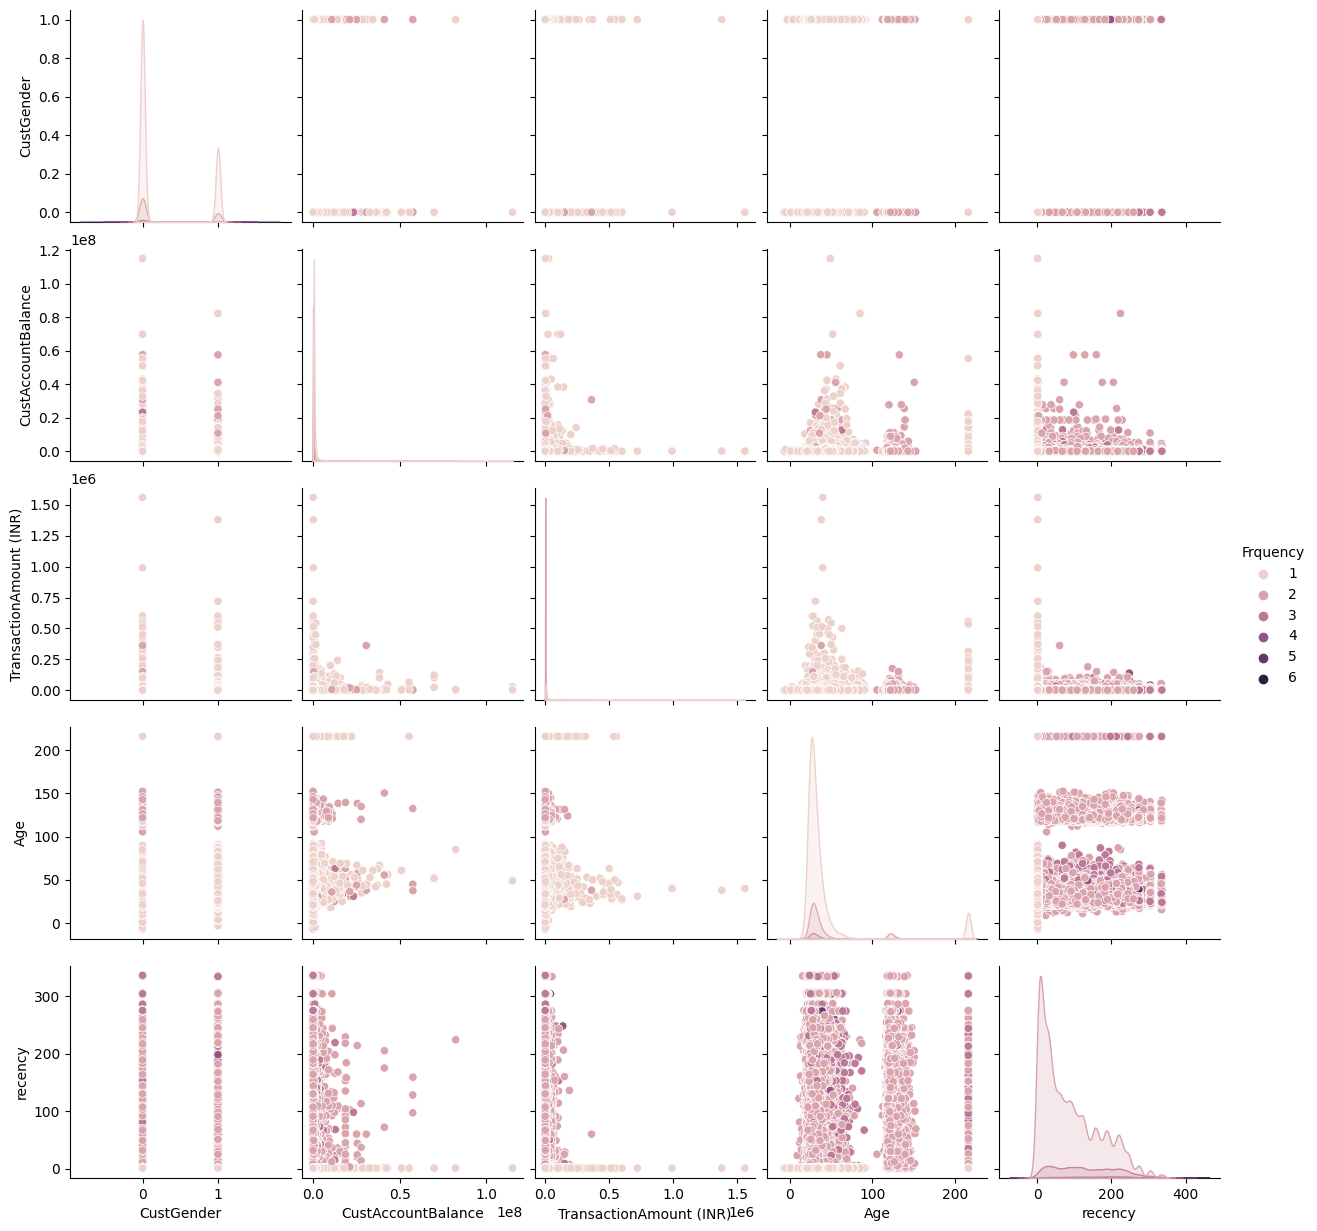

In [310]:
sns.pairplot(ndf, hue='Frquency')